In [6]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/7.8 MB 1.6 MB/s eta 0:00:05
   -------- ------------------------------- 1.6/7.8 MB 1.7 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/7.8 MB 1.7 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/7.8 MB 1.7 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/7.8 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/7.8 MB 1.7 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/7.8 MB 1.7 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.8 MB 1.5 MB/s eta 0:00:04
   ------------------ --------------------- 3.7/7.8 MB 1.5 MB/s eta 0:00:03
   -------------------- ---------

In [1]:
import numpy as np    # Importing NumPy for numerical operations
import tensorflow as tf    # Importing TensorFlow for building and training neural networks
import matplotlib.pyplot as plt     #Importing Matplotlib for plotting data
from tensorflow.keras.models import Sequential    # Importing Sequential model type (stack of layers)
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical    # Importing utility to convert labels to one-hot encoding
from tensorflow.keras.optimizers import SGD    # Importing Stochastic Gradient Descent (SGD) optimizer
import random    # Importing random module for random operations

In [2]:
# Loads the MNIST dataset, which contains images of handwritten digits (0-9)
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the CSV file
mnist_data = pd.read_csv('mnist_784_csv.csv')

In [3]:
# There are 784 pixel values for in each row i.e recored. 
# Step 2: Separate the features and labels
x_data = mnist_data.iloc[:, :-1].values  # All pixel columns
#y_data = mnist_data['class'].values      # 'class' column as labels
y_data = mnist_data.iloc[:, -1].values 

# Step 3: Normalize the pixel values to [0, 1],making it easier for the neural network to learn.
x_data = x_data / 255.0

# Step 4: Reshape each 784-pixel row into a 2D 28x28 image.
x_data = x_data.reshape(-1, 28, 28)

# Step 5: One-hot encode the labels
# One-hot encode the labels. For example, if the digit is 3, it becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This format is needed for multi-class classification.
y_data = to_categorical(y_data, 10)

# Step 6: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
# Step 7: Build the model with an Input layer
model = Sequential([
    Input(shape=(28, 28)),         # Define input shape explicitly,Flattens 28x28 image into a 1D vector
    Flatten(),
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons, using ReLU activation
    Dense(32, activation='relu'),   # Another dense layer with 32 neurons, using ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes), using Softmax activation
])
# Softmax: Used in the output layer for multi-class classification (outputs probabilities for each class).
# ReLU: Activation function that introduces non-linearity, helping the network learn complex features.
# In short, this builds a simple neural network with 3 layers that can classify 28x28 images into 10 categories.

In [5]:
# Step 8: Compile the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# optimizer=SGD(): Uses Stochastic Gradient Descent (SGD) as the optimization algorithm to update model weights during training. It helps the model learn by minimizing the loss.
# loss='categorical_crossentropy': Specifies the loss function to measure how well the model predicts the class labels. Categorical crossentropy is used for multi-class classification tasks.
# metrics=['accuracy']: Sets the metric to evaluate the model's performance during training and testing. Accuracy shows the percentage of correct predictions.

# In short, this compiles the model by defining how it will learn (optimizer), how to measure learning (loss function), and how to track performance (accuracy).

In [6]:
# Step 9: Train the model
history = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))
# epochs=20: The model will go through the entire training dataset 20 times, allowing it to learn from the data multiple times.
# batch_size=32: During training, the model will process 32 samples at a time before updating the weights. This helps manage memory and can lead to faster convergence.
# validation_data=(x_test, y_test): Uses the testing data to evaluate the model's performance after each epoch, allowing you to monitor its accuracy on unseen data.

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6022 - loss: 1.3063 - val_accuracy: 0.8954 - val_loss: 0.3755
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9065 - loss: 0.3271 - val_accuracy: 0.9205 - val_loss: 0.2841
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9231 - loss: 0.2656 - val_accuracy: 0.9296 - val_loss: 0.2507
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9325 - loss: 0.2335 - val_accuracy: 0.9406 - val_loss: 0.2191
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9410 - loss: 0.2053 - val_accuracy: 0.9426 - val_loss: 0.2049
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9466 - loss: 0.1845 - val_accuracy: 0.9471 - val_loss: 0.1888
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9515 - loss: 0.1673 - val_accuracy: 0.9509 - val_loss: 0.1762
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9558 - loss: 0.1522 -

In [7]:
#Evaluating
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'test_loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# test_loss: Represents the loss value, indicating how well the model performs on the test data (lower is better).
# test_acc: Represents the accuracy of the model on the test data, showing the percentage of correct predictions.

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1150
test_loss: 0.11787303537130356
Test Accuracy: 0.9657857418060303


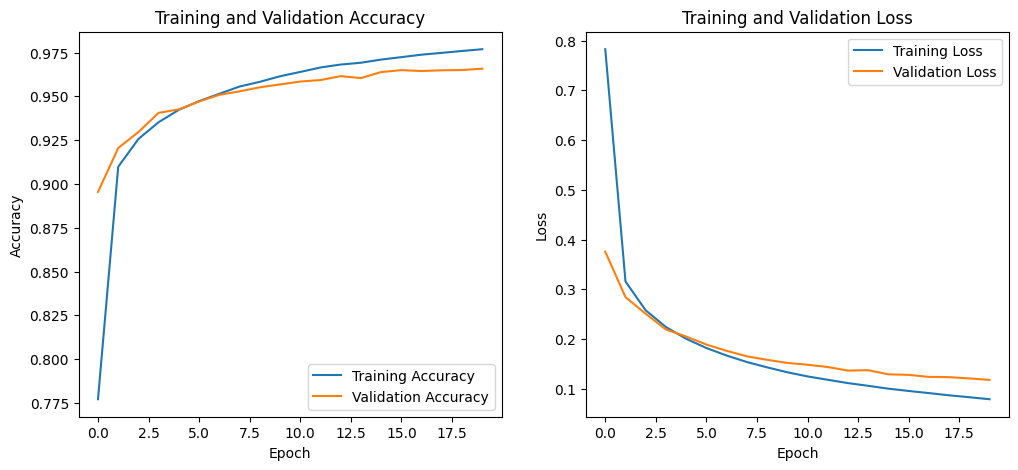

In [10]:
# Step 10: Plot the training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


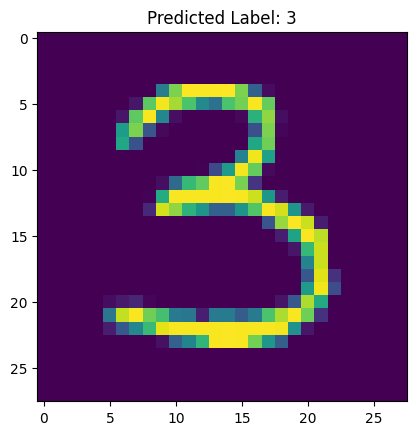

In [16]:
# Get the model's prediction for the selected image
n = random.randint(0, len(x_test) - 1) 
predicted_label = np.argmax(model.predict(x_test[n:n+1]))

# Display the image with the model's predicted label
plt.imshow(x_test[n])
plt.title(f"Predicted Label: {predicted_label}")
plt.show()
